# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training set

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set= dataset_train.iloc[:,1:2].values #Make a Numpy Array and choosed Only 2nd Column

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential() #Since we are going to predict a continuous value, we made regression, i.e. regressor.

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) )) #Only for first layer.
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50)) #return_sequences default value is false, That layer is the last one thats why we removed.
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = "adam", loss= "mean_squared_error" )

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - loss: 0.0763
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 0.0068
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - loss: 0.0047
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0049
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - loss: 0.0064
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0049
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0043
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0038
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - loss: 0.0060
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0041
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0038
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0045
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - loss: 0.0036
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price= dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0) #Vertical axis 0
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


### Visualising the results

<function matplotlib.pyplot.show(close=None, block=None)>

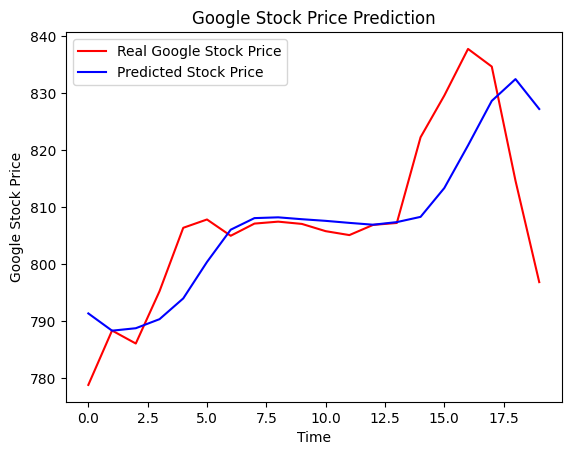

In [18]:
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show